In [1]:
import pandas as pd
#!pip install pyreadstat
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

In [2]:
df = pd.read_spss('./data/ATP W56.sav')

In [3]:
# Remove columns that will not been used in this analysis

df.drop(columns = ['QKEY','INTERVIEW_START_W56','INTERVIEW_END_W56','DEVICE_TYPE_W56','SAMPLE_W56',
                   'BREAKUP_W56','POTENTIALDATE1.a_W56', 'POTENTIALDATE1.b_W56', 'POTENTIALDATE1.c_W56', 
                   'POTENTIALDATE1.d_W56', 'POTENTIALDATE1.e_W56', 'POTENTIALDATE2.a_W56', 'POTENTIALDATE2.b_W56',
                   'POTENTIALDATE2.c_W56', 'POTENTIALDATE2.d_W56','POTENTIALDATE3.a_W56', 'POTENTIALDATE3.b_W56', 
                   'POTENTIALDATE3.c_W56', 'POTENTIALDATE3.d_W56', 'FORM_W56','WEIGHT_W56_ATPONLY','WEIGHT_W56', 
                   'F_REG', 'REG_KP','F_IDEO','F_PARTY_FINAL', 'F_PARTYLN_FINAL', 'F_PARTYSUM_FINAL', 'F_CITIZEN', 
                   'F_BORN', 'FIRSTDATE.a_W56', 'FIRSTDATE.b_W56', 'FIRSTDATE.c_W56', 'DATEACCEPT.a_W56',
                   'DATEACCEPT.b_W56', 'DATEACCEPT.c_W56', 'DATEACCEPT.d_W56', 'DATEACCEPT.e_W56'], inplace=True)

In [4]:
df.head(3)

,MARITAL_W56,MARITAL2_W56,RELATEVER_W56,CASUAL_W56,SEEKING_W56,MOTIVNODATE.a_W56,MOTIVNODATE.b_W56,MOTIVNODATE.c_W56,MOTIVNODATE.d_W56,MOTIVNODATE.e_W56,MOTIVNODATE.f_W56,MOTIVNODATE.g_W56,MOTIVNODATE.h_W56,TOTRELDUR_W56,FAMSURV19RELAT_W56,FAMSURV19DATING_W56,ONLINEDATE_W56,ONLINEDATE2_W56,PARTNERMEET_W56,ONMEET_W56,DATE10YR_W56,WHYDATE10YRHARDOE_M1_W56,WHYDATE10YRHARDOE_M2_W56,WHYDATE10YRHARDOE_M3_W56,WHYDATE10YRHARD_TECH_W56,WHYDATE10YREASYOE_M1_W56,WHYDATE10YREASYOE_M2_W56,WHYDATE10YREASYOE_M3_W56,WHYDATE10YREASY_TECH_W56,ONCHECK_W56,TRACKPARTNER_W56,BREAKUPACCEPTF1.a_W56,BREAKUPACCEPTF1.b_W56,BREAKUPACCEPTF1.c_W56,BREAKUPACCEPTF1.d_W56,BREAKUPACCEPTF1.e_W56,BREAKUPACCEPTF2.a_W56,BREAKUPACCEPTF2.b_W56,BREAKUPACCEPTF2.c_W56,BREAKUPACCEPTF2.d_W56,BREAKUPACCEPTF2.e_W56,DATEHARASSM_W56,DATEHARASSW_W56,ONIMPACT_W56,ONIMPACTPOSOE_M1_W56,ONIMPACTPOSOE_M2_W56,ONIMPACTPOSOE_M3_W56,ONIMPACTNEGOE_M1_W56,ONIMPACTNEGOE_M2_W56,ONIMPACTNEGOE_M3_W56,...,SNSCHECK.a_W56,SNSCHECK.b_W56,PARTNERDEVICE.a_W56,PARTNERDEVICE.b_W56,PARTNERDEVICE.c_W56,SNSPARTNER.a_W56,SNSPARTNER.b_W56,SNSFEEL_W56,PARTNERDISTRACT_W56,PARTNERSCREEN.a_W56,PARTNERSCREEN.b_W56,PARTNERSCREEN.c_W56,PARTNERPASS.a_W56,PARTNERPASS.b_W56,PARTNERPASS.c_W56,PARTNERTRACK_W56,DATEVOCAB.a_W56,DATEVOCAB.b_W56,DATEVOCAB.c_W56,DATEVOCAB.d_W56,DATEVOCAB.e_W56,DATEGHOST_W56,HARASSEXP1.a_W56,HARASSEXP1.b_W56,HARASSEXP1.c_W56,HARASSEXP2.a_W56,HARASSEXP2.b_W56,HARASSEXP2.c_W56,ONHARASS.a_W56,ONHARASS.b_W56,ONHARASS.c_W56,ONHARASS.d_W56,PARTNERSEX_W56,ORIENTATIONMOD_W56,F_METRO,F_CREGION,F_USR_SELFID,F_AGECAT,F_SEX,F_EDUCCAT,F_EDUCCAT2,F_RACETHN,F_NATIVITY,F_MARITAL,F_RELIG,F_ATTEND,F_INCOME,F_INCOME_RECODE,F_ACSWEB,F_VOLSUM
0,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 years or more,Very well,NaN,"No, have not done this",NaN,Through work,NaN,About the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, have not done this",Never acceptable,NaN,NaN,NaN,NaN,NaN,Always acceptable,Rarely acceptable,Rarely acceptable,Never acceptable,Rarely acceptable,Hasn’t made much difference,Hasn’t made much difference,Neither positive or negative effect,NaN,NaN,NaN,NaN,NaN,NaN,...,"No, have not done this","No, have not done this",Yes,Yes,Yes,Somewhat important,Not at all important,Refused,Sometimes,Sometimes,Sometimes,Sometimes,"No, have not done this","No, have not done this","No, have not done this","No, have not done this","No, have not heard of this","No, have not heard of this","No, have not heard of this","Yes, have heard of this","Yes, have heard of this","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me",NaN,NaN,NaN,NaN,Female,Gay or lesbian,Metropolitan,South,Urban,65+,Male,College graduate+,Postgraduate,White non-Hispanic,U.S.,Married,NaN,NaN,"$150,000 or more","$75,000+",Accesses Internet by paying a cell phone compa...,Yes
1,Never been married,"No, not in a committed romantic relationship","No, have never been in a committed romantic re...","No, not casually dating anyone",Not currently looking for a relationship or dates,Major reason,Major reason,Not a reason,Not a reason,Not a reason,Major reason,Minor reason,Not a reason,NaN,NaN,NaN,"No, have not done this",NaN,NaN,NaN,About the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, have not done this",Sometimes acceptable,NaN,NaN,NaN,NaN,NaN,Always acceptable,Rarely acceptable,Rarely acceptable,Never acceptable,Never acceptable,Hasn’t made much difference,Hasn’t made much difference,Neither positive or negative effect,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, have heard of this","No, have not heard of this","No, have not heard of this","Yes, have heard of this","Yes, have heard of this","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happen

In [5]:
df.shape

(4860, 145)

### Divide features by category for EDA

In [6]:
on_relationship_status = ['MARITAL_W56', 'MARITAL2_W56', 'RELATEVER_W56', 'CASUAL_W56', 'SEEKING_W56',
                       'MOTIVNODATE.a_W56','MOTIVNODATE.b_W56', 'MOTIVNODATE.c_W56', 'MOTIVNODATE.d_W56', 
                       'MOTIVNODATE.e_W56', 'MOTIVNODATE.f_W56', 'MOTIVNODATE.g_W56', 'MOTIVNODATE.h_W56', 
                       'TOTRELDUR_W56', 'FAMSURV19RELAT_W56', 'FAMSURV19DATING_W56' ]

on_internet_use = ['SNSUSE_W56', 'SNSPOST_W56', 'ONLINEDATE_W56', 'ONLINEDATE2_W56', 'ONCHECK_W56', 
                   'BREAKUPACCEPTF1.a_W56', 'BREAKUPACCEPTF1.b_W56','BREAKUPACCEPTF1.c_W56', 
                   'BREAKUPACCEPTF1.d_W56','BREAKUPACCEPTF1.e_W56', 'BREAKUPACCEPTF2.a_W56','BREAKUPACCEPTF2.b_W56', 
                   'BREAKUPACCEPTF2.c_W56', 'BREAKUPACCEPTF2.d_W56', 'BREAKUPACCEPTF2.e_W56', 'PARTNERDEVICE.a_W56',
                   'PARTNERDEVICE.b_W56', 'PARTNERDEVICE.c_W56']



on_harassment = ['DATEHARASSM_W56', 'DATEHARASSW_W56', 'HARASSEXP1.a_W56', 'HARASSEXP1.b_W56', 'HARASSEXP1.c_W56', 
              'HARASSEXP2.a_W56', 'HARASSEXP2.b_W56', 'HARASSEXP2.c_W56', 'ONHARASS.a_W56', 'ONHARASS.b_W56', 
              'ONHARASS.c_W56', 'ONHARASS.d_W56']   

on_internet_opinion = ['ONIMPACT_W56', 'ONIMPACTPOSOE_M1_W56', 'ONIMPACTPOSOE_M2_W56', 'ONIMPACTPOSOE_M3_W56', 
                    'ONIMPACTNEGOE_M1_W56', 'ONIMPACTNEGOE_M2_W56', 'ONIMPACTNEGOE_M3_W56', 'ONSUCCESS_W56',
                    'ONSAFE_W56', 'ONPROBLEM.a_W56', 'ONPROBLEM.b_W56', 'ONPROBLEM.c_W56', 'ONPROBLEM.d_W56', 
                    'ONPROBLEM.e_W56', 'DATE10YR_W56','WHYDATE10YRHARDOE_M1_W56', 'WHYDATE10YRHARDOE_M2_W56', 
                       'WHYDATE10YRHARDOE_M3_W56', 'WHYDATE10YRHARD_TECH_W56','WHYDATE10YREASYOE_M1_W56', 
                       'WHYDATE10YREASYOE_M2_W56', 'WHYDATE10YREASYOE_M3_W56', 'WHYDATE10YREASY_TECH_W56', 
                       'ONDATA_W56', 'ONSAFE_W56']

individual_characs = ['PARTNERSEX_W56', 'ORIENTATIONMOD_W56']

on_privacy = ['PARTNERPASS.a_W56','PARTNERPASS.b_W56','PARTNERPASS.c_W56','PARTNERTRACK_W56','SNSCHECK.a_W56',
              'SNSCHECK.b_W56']
       
on_dating_preferences = ['ONPROFILES.a_W56', 'ONPROFILES.b_W56', 'ONPROFILES.c_W56', 
                          'ONPROFILES.d_W56', 'ONPROFILES.e_W56', 'ONPROFILES.f_W56', 'ONPROFILES.g_W56', 
                         'ONPROFILES.h_W56', 'ONPROFILES.i_W56']


on_online_experiences = ['ONFIND.a_W56', 'ONFIND.b_W56', 'ONFIND.c_W56', 'ONFIND.d_W56', 'DATEVOCAB.a_W56', 
                         'ONMSGF1_W56','ONMSGF2_W56', 'ONALGORITHM_W56', 'DATEVOCAB.b_W56', 'DATEVOCAB.c_W56', 
                         'DATEVOCAB.d_W56', 'DATEVOCAB.e_W56','DATEGHOST_W56', 'ONEXPGEN_W56', 'ONFEEL.a_W56', 
                         'ONFEEL.b_W56','ONFEEL.c_W56', 'ONEXP.a_W56', 'ONEXP.b_W56','ONEXP.c_W56']

on_how_meet = ['PARTNERMEET_W56', 'ONMEET_W56', 'DATEDIFF_W56','WHYDATEDIFF.a_W56', 'WHYDATEDIFF.b_W56', 
               'WHYDATEDIFF.c_W56', 'WHYDATEDIFF.d_W56', 'WHYDATEDIFF.e_W56', 'WHYDATEDIFF.f_W56']

on_feelings = ['SNSSEE1_W56', 'SNSSEE2_W56', 'SNSFEEL_W56', 'PARTNERDISTRACT_W56','PARTNERSCREEN.a_W56', 
               'PARTNERSCREEN.b_W56', 'PARTNERSCREEN.c_W56', 'DATEPRESSURE.a_W56', 'DATEPRESSURE.b_W56', 
               'DATEPRESSURE.c_W56', 'SNSPARTNER.a_W56','SNSPARTNER.b_W56']

In [7]:
age_column = 'F_AGECAT'

Dropping rows that had 'refused/did not know' for ages

In [82]:
indexNames = df[df['F_AGECAT'] == 'DK/REF'].index
df.drop(indexNames , inplace=True)

In [85]:
df[age_column].value_counts(normalize = True)

30-49     0.335667
50-64     0.300659
65+       0.198517
18-29     0.165157
DK/REF    0.000000
Name: F_AGECAT, dtype: float64

Using for loop to analyze multiple graphs from certain categories mentioned above

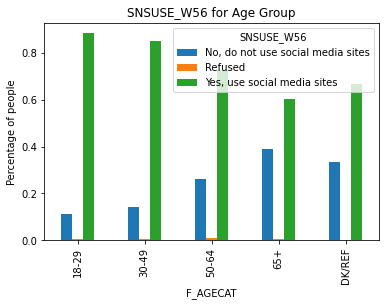

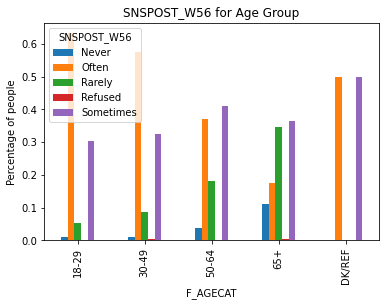

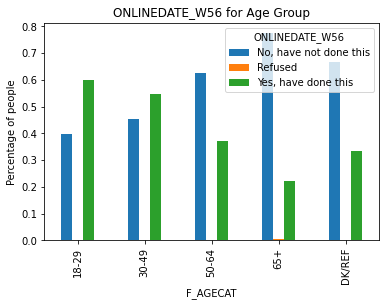

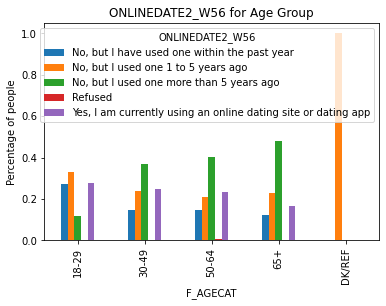

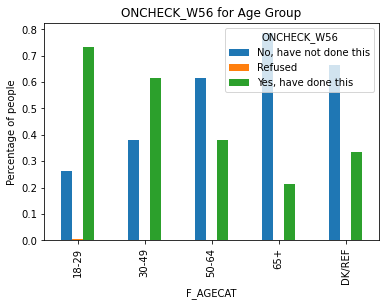

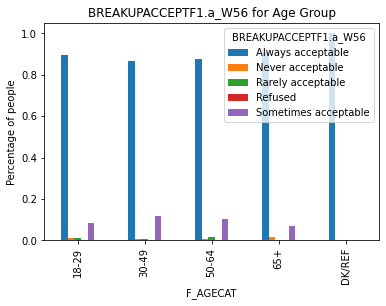

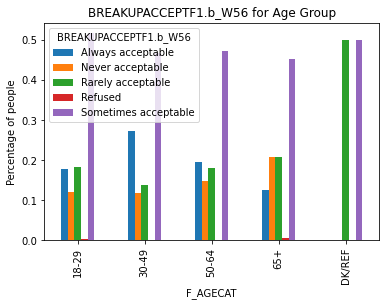

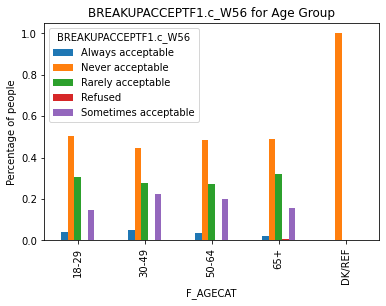

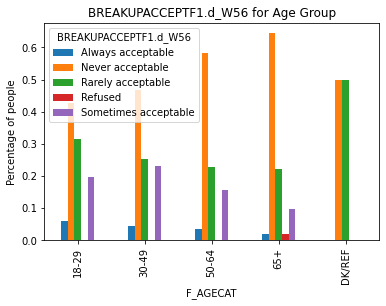

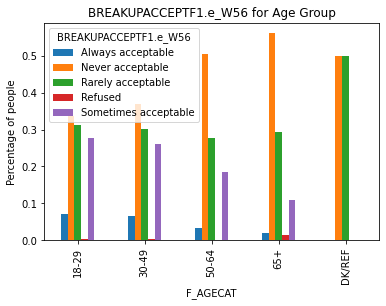

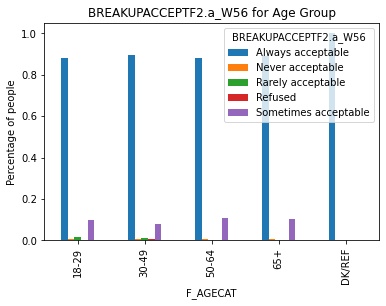

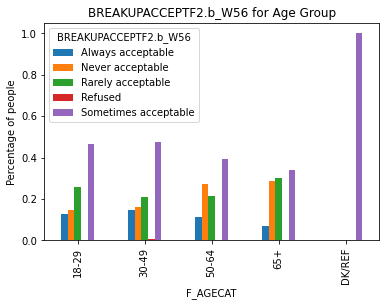

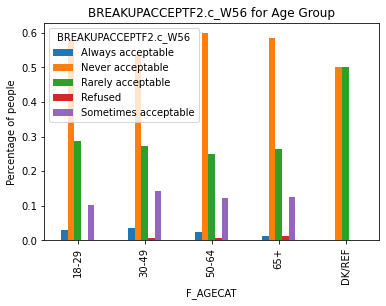

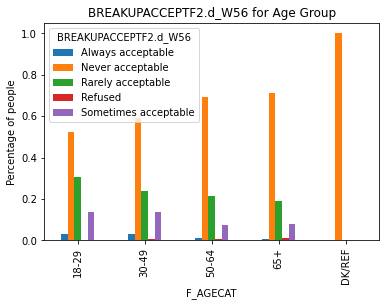

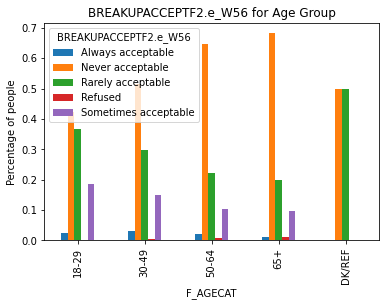

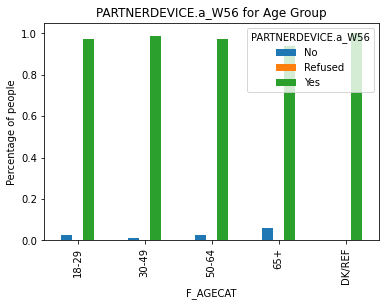

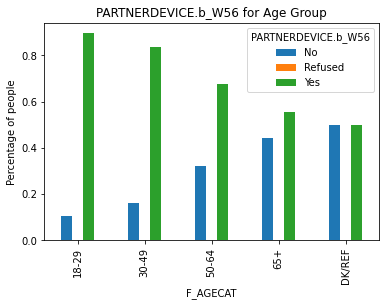

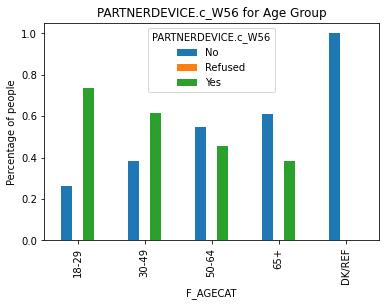

In [37]:
for question in on_internet_use:
    pd.crosstab(df[age_column],df[question], normalize='index').plot(kind='bar');
    plt.title(f'{question} for Age Group');
    plt.ylabel('Percentage of people');
    plt.show() 

Final graphs I will include in presentation

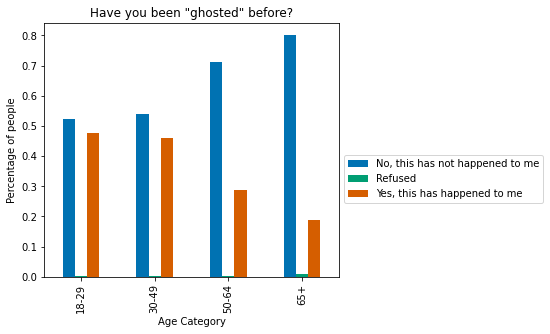

In [145]:
pd.crosstab(df[age_column],df['DATEGHOST_W56'], normalize='index').plot(kind='bar', figsize = (8,5), style='seaborn-colorblind')
plt.title('Have you been "ghosted" before?')
plt.ylabel('Percentage of people')
plt.xlabel('Age Category')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2)
plt.savefig('been_ghosted_age', transparent=True);

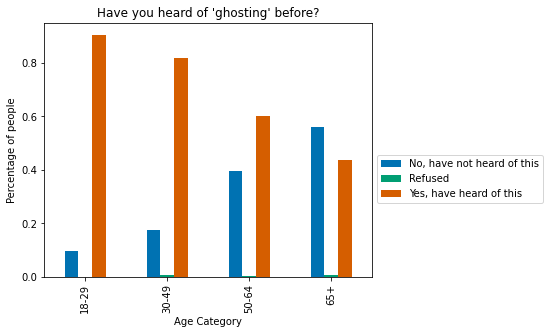

In [146]:
pd.crosstab(df[age_column],df['DATEVOCAB.a_W56'], normalize='index').plot(kind='bar', figsize = (8,5), style='seaborn-colorblind')
plt.title("Have you heard of 'ghosting' before?")
plt.ylabel('Percentage of people')
plt.xlabel('Age Category')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2)
plt.savefig('heard_ghosting_age', transparent=True);

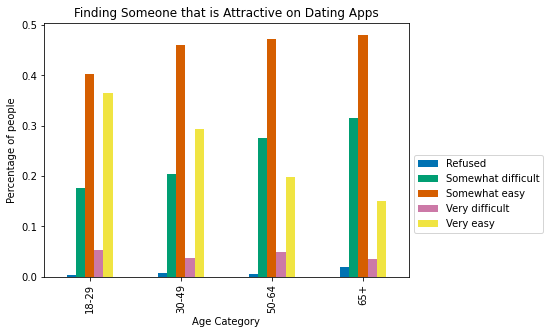

In [147]:
pd.crosstab(df[age_column],df['ONFIND.a_W56'], normalize='index').plot(kind='bar', figsize = (8,5), style='seaborn-colorblind')
plt.title('Finding Someone that is Attractive on Dating Apps')
plt.ylabel('Percentage of people')
plt.xlabel('Age Category')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2)
plt.savefig('finding_attractive_people_age', transparent=True);

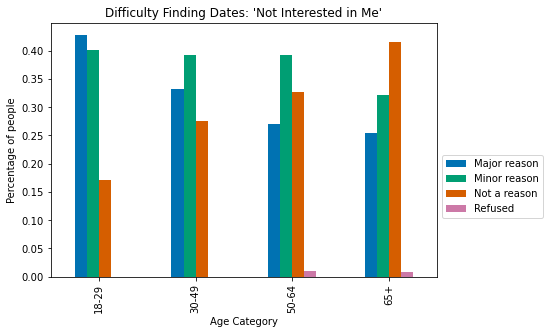

In [148]:
pd.crosstab(df[age_column],df['WHYDATEDIFF.e_W56'], normalize='index').plot(kind='bar', figsize=(8,5), style='seaborn-colorblind')
plt.title("Difficulty Finding Dates: 'Not Interested in Me'")
plt.ylabel('Percentage of people')
plt.xlabel('Age Category')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2)
plt.savefig('not_interested_age', transparent=True);

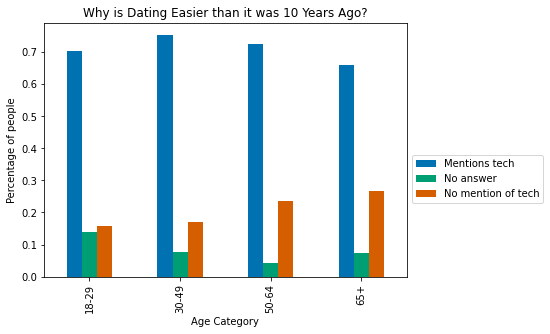

In [149]:
pd.crosstab(df[age_column],df['WHYDATE10YREASY_TECH_W56'], normalize='index').plot(kind='bar', figsize =(8,5), style='seaborn-colorblind')
plt.title('Why is Dating Easier than it was 10 Years Ago?')
plt.ylabel('Percentage of people')
plt.xlabel('Age Category')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2)
plt.savefig('dating_easier_10yrs_age', transparent=True);

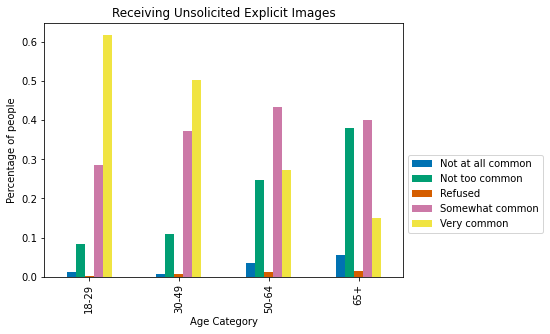

In [150]:
pd.crosstab(df[age_column],df['ONPROBLEM.b_W56'], normalize='index').plot(kind='bar', figsize = (8,5), style='seaborn-colorblind')
plt.title('Receiving Unsolicited Explicit Images')
plt.ylabel('Percentage of people')
plt.xlabel('Age Category')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2)
plt.savefig('unsolicited_images_age', transparent=True);